In [1]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
pickle_in = open("./resources/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./resources/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("./resources/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("./resources/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("./resources/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./resources/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (312, 512, 512, 3) Y_train= (312,)
X_valid= (180, 512, 512, 3) Y_valid= (180,)
X_test= (138, 512, 512, 3) Y_test= (138,)


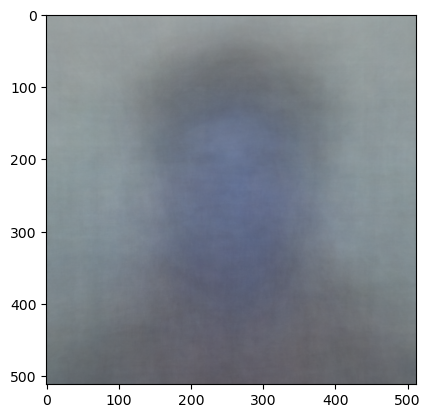

In [3]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [4]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),


    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(39),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 96)      34944     
                                                                 
 activation (Activation)     (None, 126, 126, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 53, 53, 256)       0

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=50, validation_data=(X_valid_norm, Y_valid), batch_size=10)

Epoch 1/50
32/32 [==============================] - 19s 220ms/step - loss: 5.0013 - accuracy: 0.0609 - val_loss: 2742.1541 - val_accuracy: 0.0278
Epoch 2/50
32/32 [==============================] - 5s 165ms/step - loss: 4.3178 - accuracy: 0.1250 - val_loss: 485.4382 - val_accuracy: 0.0444
Epoch 3/50
32/32 [==============================] - 5s 170ms/step - loss: 4.1052 - accuracy: 0.1506 - val_loss: 186.1776 - val_accuracy: 0.0500
Epoch 4/50
32/32 [==============================] - 5s 160ms/step - loss: 3.9579 - accuracy: 0.1378 - val_loss: 135.6788 - val_accuracy: 0.0389
Epoch 5/50
32/32 [==============================] - 5s 154ms/step - loss: 3.6396 - accuracy: 0.2276 - val_loss: 71.8055 - val_accuracy: 0.0444
Epoch 6/50
32/32 [==============================] - 5s 153ms/step - loss: 3.4552 - accuracy: 0.1955 - val_loss: 44.7239 - val_accuracy: 0.0889
Epoch 7/50
32/32 [==============================] - 5s 153ms/step - loss: 3.4022 - accuracy: 0.2372 - val_loss: 39.5408 - val_accuracy: 

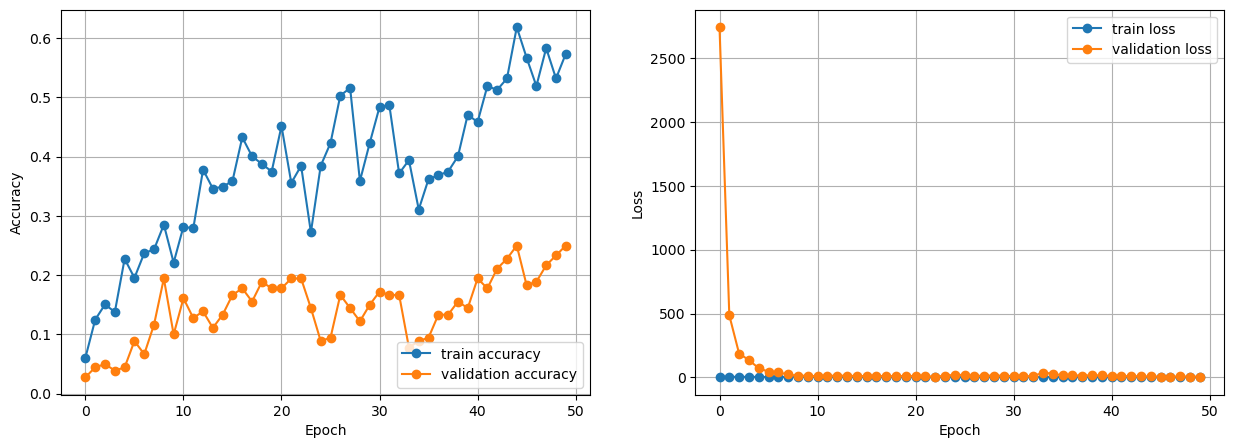

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

5/5 [==============================] - 2s 60ms/step - loss: 7.3985 - accuracy: 0.2246

Test Accuracy: 0.2246376872062683

Test Loss: 7.398544788360596


In [10]:
tf.keras.models.save_model(model, './resources/alexnet_model.h5', overwrite=True, include_optimizer=True, save_format=None , signatures=None, options=None)